# **Preprocessing, Feature Engineering, Feature Selection**

In [1]:
import pandas as pd

df = pd.read_csv("AAPL.csv", skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].set_index('Date')
df = df.loc['2011-01-01':'2024-12-31']

df['Close_lag1'] = df['Close'].shift(1)  # Yesterday’s closing price
df['Close_lag5'] = df['Close'].shift(5)  # Last week's closing price
df['Close_lag21'] = df['Close'].shift(21)  # Last month's closing price
df['Close_lag63'] = df['Close'].shift(63)  # Quarter's closing price

df['Volume_lag1'] = df['Volume'].shift(1)  # Volume from 1 days ago
df['Volume_lag5'] = df['Volume'].shift(5)  # Volume from 5 days ago
df['Volume_lag21'] = df['Volume'].shift(21)  # Volume from 21 days ago
df['Volume_lag63'] = df['Volume'].shift(63)  # Volume from 63 days ago

df['return_1d'] = df['Close_lag1'].pct_change()         # Daily return
df['return_5d'] = df['Close_lag1'].pct_change(5)        # 5-day return
df['return_21d'] = df['Close_lag1'].pct_change(21)      # 21-day return
df['return_63d'] = df['Close_lag1'].pct_change(63)      # 63-day return

df['ma_5'] = df['Close_lag1'].rolling(window=5).mean()
df['ma_21'] = df['Close_lag1'].rolling(window=21).mean()
df['ma_63'] = df['Close_lag1'].rolling(window=63).mean()

df['volatility_5'] = df['Close_lag1'].rolling(window=5).std()
df['volatility_21'] = df['Close_lag1'].rolling(window=21).std()
df['volatility_63'] = df['Close_lag1'].rolling(window=63).std()

df['momentum_5'] = df['Close_lag1'] - df['Close_lag1'].shift(5)
df['momentum_21'] = df['Close_lag1'] - df['Close_lag1'].shift(21)
df['momentum_63'] = df['Close_lag1'] - df['Close_lag1'].shift(63)

df['intraday_range'] = df['High'].shift(1) - df['Low'].shift(1)
df['gap'] = df['Open'].shift(1) - df['Close_lag1'].shift(1)
df['intraday_change'] = df['Close'].shift(1) - df['Open'].shift(1)
df['upper_shadow'] = df['High'].shift(1) - df[['Open', 'Close']].shift(1).max(axis=1)
df['lower_shadow'] = df[['Open', 'Close']].shift(1).min(axis=1) - df['Low'].shift(1)
df['edit_out'] = df['Close'] * [-1]

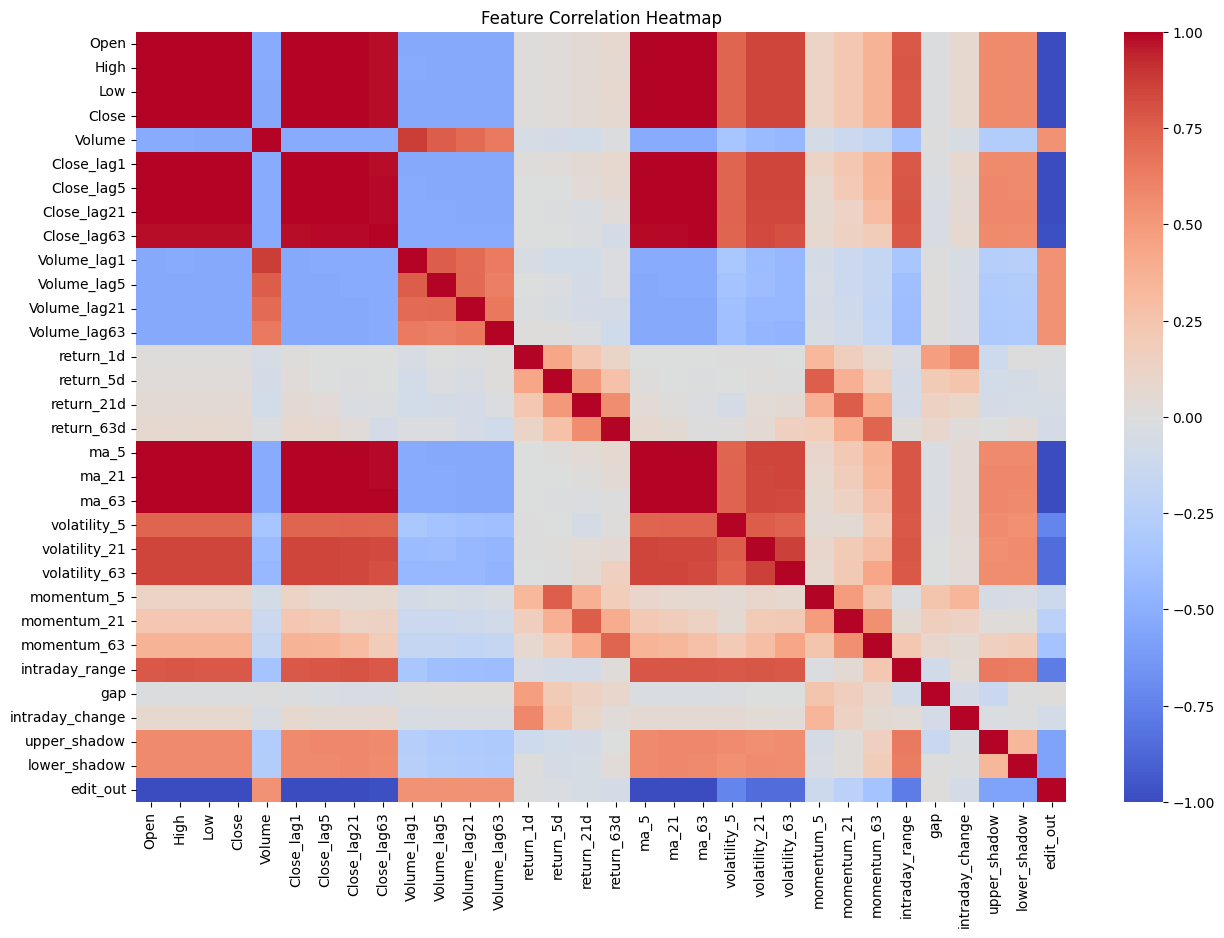

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.dropna().corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


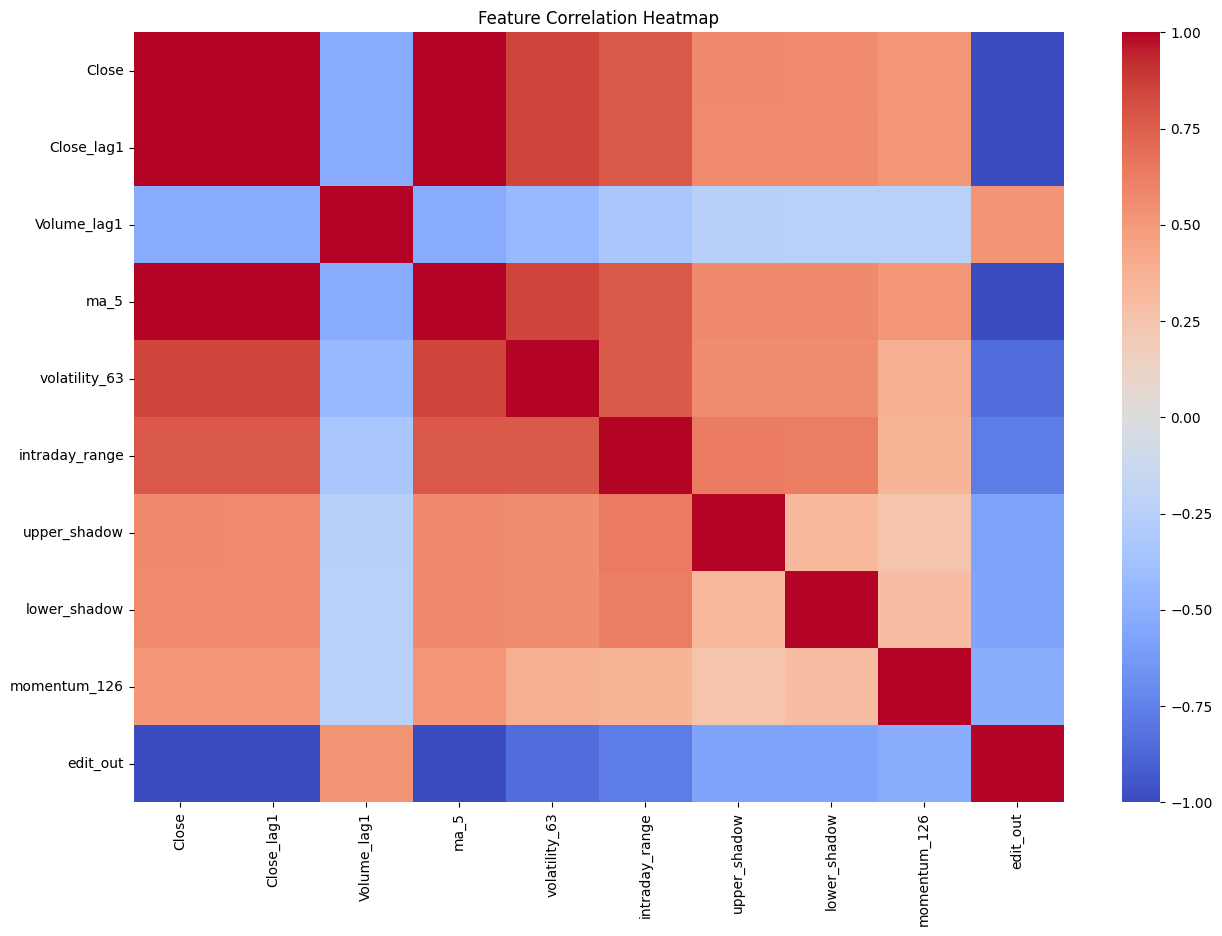

In [3]:
df = df.drop(columns=['return_1d', 'return_5d', 'return_21d', 'return_63d', 'gap', 'intraday_change']) \
       .drop(columns=['Volume', 'Volume_lag5', 'Volume_lag21', 'Volume_lag63']) \
       .drop(columns=['momentum_5', 'momentum_21', 'momentum_63', 'volatility_5', 'volatility_21']) \
       .drop(columns=['Close_lag5', 'Close_lag21', 'Close_lag63', 'ma_21', 'ma_63'])

df['momentum_126'] = df['Close'] - df['Close'].shift(126)
df = df.drop(columns=['edit_out'])
df['edit_out'] = df['Close'] * [-1]
df = df.drop(columns=['Open', 'High', 'Low'])
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.dropna().corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [7]:
df = df.drop(columns=['edit_out'])

In [8]:
df.head()

,Close,Close_lag1,Volume_lag1,ma_5,volatility_63,intraday_range,upper_shadow,lower_shadow,momentum_126
Date,,,,,,,,,
2011-01-03,9.917947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,9.969708,9.917947,445138400.0,NaN,NaN,0.163107,0.020765,0.024075,NaN
2011-01-05,10.051258,9.969708,309080800.0,NaN,NaN,0.130907,0.001806,0.094494,NaN
2011-01-06,10.043139,10.051258,255519600.0,NaN,NaN,0.145653,0.010232,0.001505,NaN
2011-01-07,10.115063,10.043139,300428800.0,NaN,NaN,0.070720,0.015950,0.024978,NaN


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0791
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0059
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0028
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0023
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0021
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0020
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0019
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0020
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0019
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0019
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0019
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0020
Epoch 13/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0018
Epoch 14/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0018
Epoch 15/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0018
Epoch 16/20
23/

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/valida

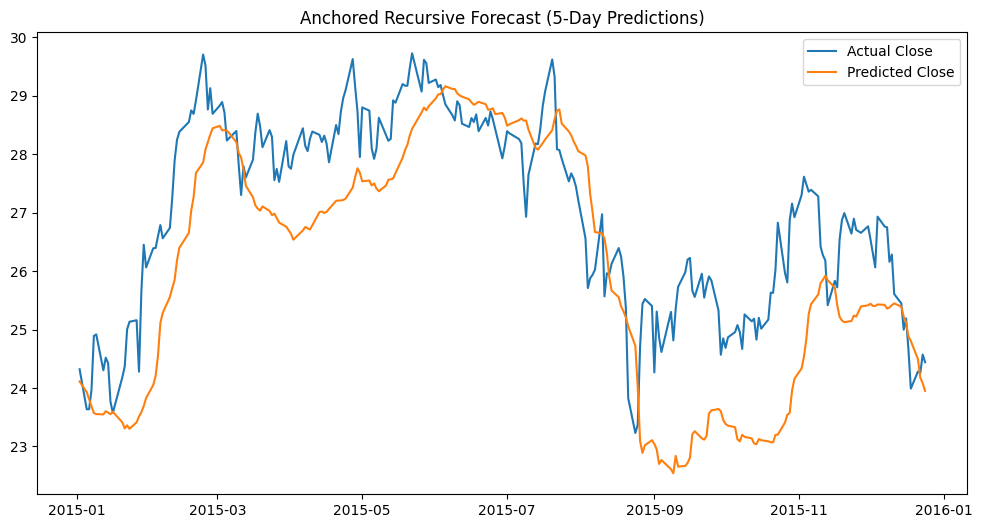

In [36]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 1: Filter training and test data
train_df = df.loc['2012-01-01':'2014-12-31']
test_df = df.loc['2014-12-01':'2015-12-31']

features = df.columns.drop('Close')

# Step 2: Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(train_df[features])
y_train = scaler_y.fit_transform(train_df[['Close']])

X_test = scaler_X.transform(test_df[features])
y_test = scaler_y.transform(test_df[['Close']])

# Step 3: Create sequences
def create_sequences(X, y, window=20, horizon=5):
    Xs, ys = [], []
    for i in range(len(X) - window - horizon + 1):
        Xs.append(X[i:i+window])
        ys.append(y[i+window:i+window+horizon].flatten())
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train, y_train)

# Step 4: Build the LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dense(1)  # Predicting 5 future Close prices
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, verbose=1)

# Step 5: Recursive 5-day forecast using rolling predictions
window = 20
horizon = 5
X_test_full = X_test
dates = test_df.index

y_pred_scaled = []
y_pred_dates = []

start = 0
while start + window + horizon <= len(X_test_full):
    current_input = X_test_full[start:start+window].copy()  # Initial 20-day input

    pred_dates = dates[start + window : start + window + horizon]

    for i in range(horizon):
        date_i = pred_dates[i]
        if date_i < pd.Timestamp("2015-01-01") or date_i > pd.Timestamp("2015-12-31"):
            continue  # Skip if not in 2015
        X_input_seq = current_input[-window:].reshape(1, window, -1)

        # Predict next day (scaled Close)
        next_close_scaled = model.predict(X_input_seq, verbose=0)[0][0]
        y_pred_scaled.append([next_close_scaled])
        y_pred_dates.append(pred_dates[i])

        # Get next date's feature row from df (already computed, unscaled)
        real_next_row = df.loc[date_i, features].values.reshape(1, -1)

# Scale it
        real_next_row_scaled = scaler_X.transform(real_next_row)

# Replace Close_lag1 in scaled row with the predicted value
        real_next_row_scaled[0, features.get_loc('Close_lag1')] = next_close_scaled

# Append to current input
        current_input = np.vstack([current_input, real_next_row_scaled])


    # Snap to real values every 5 days
    start += horizon

# Convert to original scale
y_pred_scaled = np.array(y_pred_scaled).reshape(-1, 1)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Match actual values
y_true = test_df.loc[y_pred_dates, 'Close']

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_true.index, y_true.values, label='Actual Close')
plt.plot(y_true.index, y_pred.flatten(), label='Predicted Close')
plt.legend()
plt.title('Anchored Recursive Forecast (5-Day Predictions)')
plt.show()



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/valida

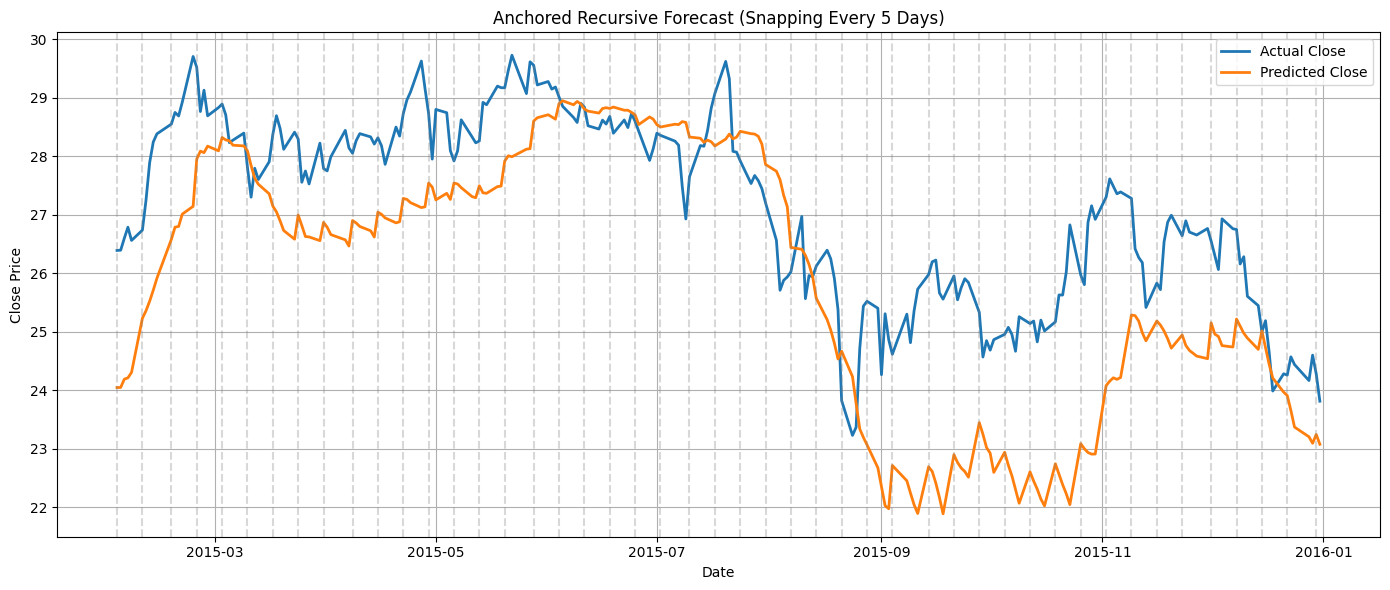

In [27]:
features = list(features)  # ensure it's a Python list
# Reuse the same features list from earlier
lookback_start = pd.Timestamp("2014-12-01")  # at least 20 days before Jan 2015
lookback_end = pd.Timestamp("2015-12-31")

df_test_window = df.loc[lookback_start:lookback_end].copy()
dates = df_test_window.index

X_test_full = scaler_X.transform(df_test_window[features])

window = 20
horizon = 5

y_pred_scaled = []
y_pred_dates = []

# All dates of test set
dates = df.loc['2015-01-01':'2015-12-31'].index

# Number of forecast blocks
n_blocks = (len(dates) - window) // horizon + 1

for b in range(n_blocks):
    # Calculate start index of current block in the whole df (test set)
    block_start_idx = b * horizon
    block_window_start_idx = block_start_idx
    block_window_end_idx = block_window_start_idx + window

    # Get the real observed data for the input window (20 days)
    window_dates = dates[block_window_start_idx:block_window_end_idx]
    X_input_window_real = df.loc[window_dates, features].values
    X_input_window_scaled = scaler_X.transform(X_input_window_real)

    # For each day in horizon (5 days)
    current_input = X_input_window_scaled.copy()
    for h in range(horizon):
        pred_date_idx = block_window_end_idx + h
        if pred_date_idx >= len(dates):
            break

        pred_date = dates[pred_date_idx]

        # Prepare input for prediction (last 20 days)
        X_input_seq = current_input[-window:].reshape(1, window, -1)

        # Predict scaled Close_lag1
        next_close_scaled = model.predict(X_input_seq, verbose=0)[0][0]
        y_pred_scaled.append([next_close_scaled])
        y_pred_dates.append(pred_date)

        # Build next day input row:
        # Take the real data row for the prediction date,
        # but replace 'Close_lag1' feature with predicted close
        next_day_real = df.loc[pred_date, features].copy()
        next_day_real_scaled = scaler_X.transform(next_day_real.values.reshape(1, -1))[0]

        # Override Close_lag1 with predicted value
        close_lag1_idx = features.index('Close_lag1')
        next_day_real_scaled[close_lag1_idx] = next_close_scaled

        # Append to current input to predict next horizon day
        current_input = np.vstack([current_input, next_day_real_scaled])


# Convert predictions back to real scale
y_pred_scaled = np.array(y_pred_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Get the true Close prices for predicted dates
y_true = df.loc[y_pred_dates, 'Close']

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.plot(y_true.index, y_true.values, label='Actual Close', linewidth=2)
plt.plot(y_true.index, y_pred.flatten(), label='Predicted Close', linewidth=2)

# Add vertical lines to show each weekly re-anchor
for dt in y_pred_dates[::5]:
    plt.axvline(dt, color='gray', linestyle='--', alpha=0.3)

plt.title("Anchored Recursive Forecast (Snapping Every 5 Days)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [18]:
print(f"Start: {start}, Pred dates: {pred_dates[0]} to {pred_dates[-1]}")
print(f"Current input Close_lag1 first value (should be from real data): {current_input[0, features.index('Close_lag1')]}")


Start: 250, Pred dates: 2015-12-18 00:00:00 to 2015-12-24 00:00:00
Current input Close_lag1 first value (should be from real data): 1.0044115710014374


In [23]:
assert pd.Series(y_pred_dates).equals(y_true.index), "Mismatch in prediction and true indices!"


AssertionError: Mismatch in prediction and true indices!

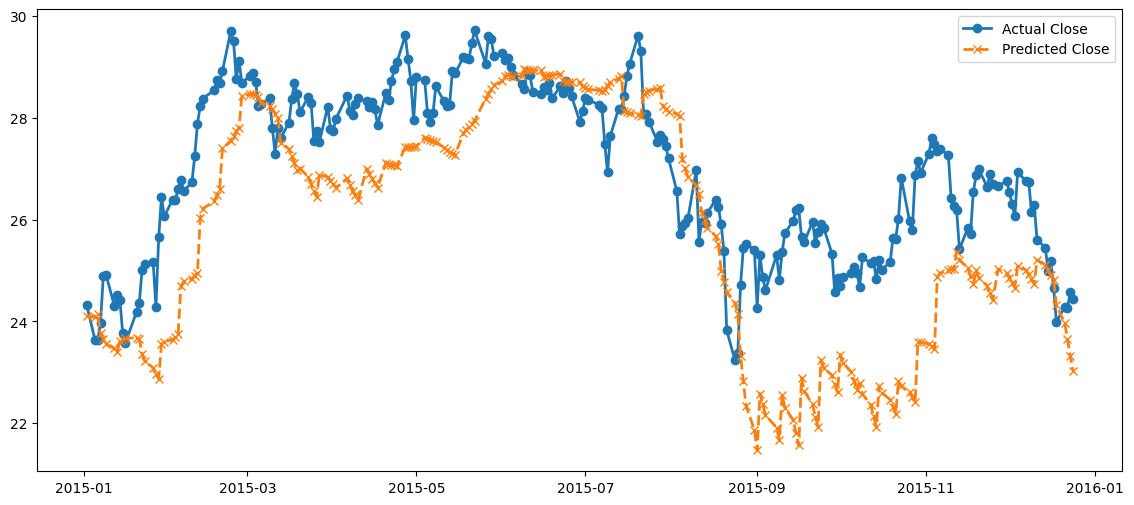

In [20]:
plt.figure(figsize=(14,6))
plt.plot(y_true.index, y_true.values, 'o-', label='Actual Close', linewidth=2)
plt.plot(y_true.index, y_pred.flatten(), 'x--', label='Predicted Close', linewidth=2)
plt.legend()
plt.show()


In [24]:
pred_dates = pd.Series(y_pred_dates)
true_dates = y_true.index

print("Dates in predicted but NOT in actual:")
print(pred_dates[~pred_dates.isin(true_dates)].unique())

print("\nDates in actual but NOT in predicted:")
print(true_dates[~true_dates.isin(pred_dates)].unique())


Dates in predicted but NOT in actual:
<DatetimeArray>
[]
Length: 0, dtype: datetime64[ns]

Dates in actual but NOT in predicted:
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


In [25]:
print("Predicted dates dtype:", pred_dates.dtype)
print("True dates dtype:", true_dates.dtype)

print("Predicted dates sorted equals true dates sorted:",
      pred_dates.sort_values().reset_index(drop=True).equals(pd.Series(true_dates).sort_values().reset_index(drop=True)))

print("Length predicted dates:", len(pred_dates))
print("Length true dates:", len(true_dates))

print("Any duplicates in predicted dates?", pred_dates.duplicated().any())
print("Any duplicates in true dates?", true_dates.duplicated().any())


Predicted dates dtype: datetime64[ns]
True dates dtype: datetime64[ns]
Predicted dates sorted equals true dates sorted: True
Length predicted dates: 248
Length true dates: 248
Any duplicates in predicted dates? False
Any duplicates in true dates? False


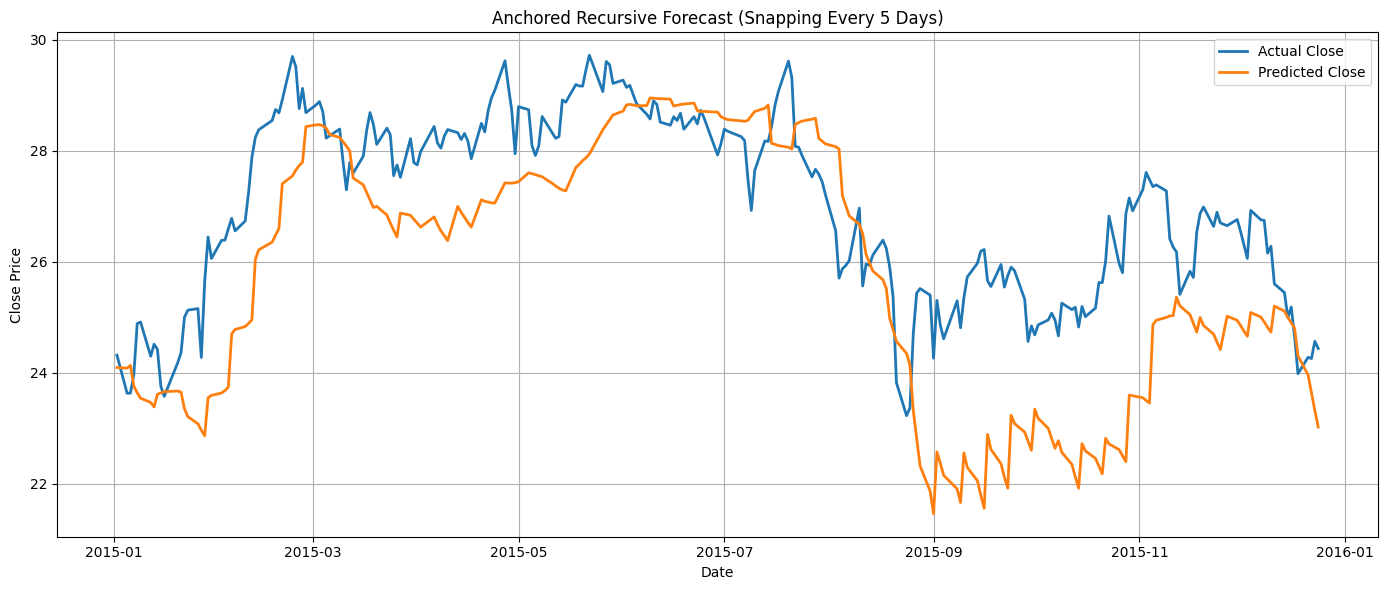

In [26]:
import matplotlib.pyplot as plt

# Sort predicted dates and reorder predictions accordingly
sorted_pred_dates = pd.Series(y_pred_dates).sort_values().reset_index(drop=True)
sorted_y_pred = pd.Series(y_pred.flatten())[pd.Series(y_pred_dates).argsort()].reset_index(drop=True)

# Extract true values in sorted order of dates
sorted_y_true = y_true.loc[sorted_pred_dates].reset_index(drop=True)

plt.figure(figsize=(14, 6))
plt.plot(sorted_pred_dates, sorted_y_true, label='Actual Close', linewidth=2)
plt.plot(sorted_pred_dates, sorted_y_pred, label='Predicted Close', linewidth=2)

plt.title("Anchored Recursive Forecast (Snapping Every 5 Days)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/valida

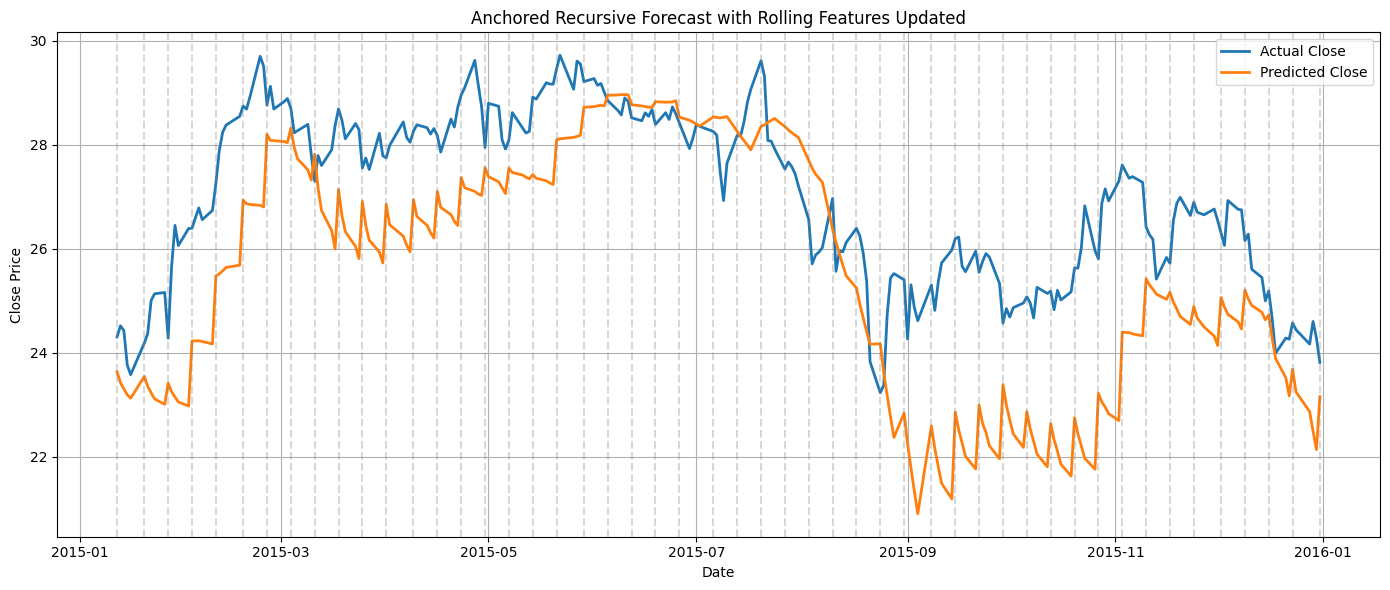

In [30]:
import numpy as np
import pandas as pd

# Ensure features is a Python list
features = list(features)

window = 20
horizon = 5

lookback_start = pd.Timestamp("2014-12-01")  # 20+ days before 2015-01-01 for initial window
lookback_end = pd.Timestamp("2015-12-31")

# Subset dataframe to the full range including lookback for rolling
df_test_window = df.loc[lookback_start:lookback_end].copy()
dates = df_test_window.index

# Initialize predictions containers
y_pred_scaled = []
y_pred_dates = []

# Index of key features
idx_close_lag1 = features.index('Close_lag1')
idx_ma_5 = features.index('ma_5')
idx_volatility_63 = features.index('volatility_63')

# Function to recompute rolling features based on Close_lag1 scaled values
def recompute_features(past_window_scaled):
    """
    past_window_scaled: numpy array shape (window, n_features),
    containing all features including Close_lag1.
    Returns new features vector for next day (same feature order).
    """
    new_features = past_window_scaled[-1].copy()

    # Recompute ma_5 on last 5 Close_lag1 values
    close_lag1_vals = past_window_scaled[-5:, idx_close_lag1]
    new_features[idx_ma_5] = np.mean(close_lag1_vals)

    # Recompute volatility_63 (std dev of last 63 Close_lag1 values)
    length_for_vol = min(len(past_window_scaled), 63)
    close_lag1_vals_vol = past_window_scaled[-length_for_vol:, idx_close_lag1]
    new_features[idx_volatility_63] = np.std(close_lag1_vals_vol)

    # Add any other rolling features recalculations here if needed

    return new_features

# Get all dates for 2015
all_2015_dates = df.loc['2014-12-11':'2015-12-31'].index

# Calculate number of forecast blocks
n_blocks = (len(all_2015_dates) - window) // horizon + 1

for b in range(n_blocks):
    block_start_idx = b * horizon
    block_window_start_idx = block_start_idx
    block_window_end_idx = block_window_start_idx + window

    # Get real window dates and real features (unscaled)
    window_dates = all_2015_dates[block_window_start_idx:block_window_end_idx]
    X_window_real = df.loc[window_dates, features].values

    # Scale input window
    X_window_scaled = scaler_X.transform(X_window_real)

    # Force the last row's Close_lag1 in the anchor window to the true scaled close price at the anchor date
    anchor_date = window_dates[-1]
    true_close_anchor_scaled = scaler_y.transform([[df.loc[anchor_date, 'Close']]])[0][0]
    X_window_scaled[-1, idx_close_lag1] = true_close_anchor_scaled

    current_input = X_window_scaled.copy()


    # Start recursive prediction for horizon days
    current_input = X_window_scaled.copy()

    for h in range(horizon):
        pred_date_idx = block_window_end_idx + h
        if pred_date_idx >= len(all_2015_dates):
            break
        pred_date = all_2015_dates[pred_date_idx]

        # Prepare model input shape (1, window, features)
        X_input_seq = current_input[-window:].reshape(1, window, -1)

        # Predict next scaled Close_lag1
        next_close_scaled = model.predict(X_input_seq, verbose=0)[0][0]

        # Save prediction and date
        y_pred_scaled.append([next_close_scaled])
        y_pred_dates.append(pred_date)

        # Build next day's feature vector based on previous window + predicted close
        # Start with last row's features:
        new_row = current_input[-1].copy()

        # Update Close_lag1 with predicted close
        new_row[idx_close_lag1] = next_close_scaled

        # Append new_row temporarily to current_input to recompute rolling features correctly
        temp_input = np.vstack([current_input, new_row])

        # Recompute rolling features based on temp_input (including predicted close)
        new_row_updated = recompute_features(temp_input)

        # Append updated features row for next prediction
        current_input = np.vstack([current_input, new_row_updated])

# Convert scaled predictions back to original scale
y_pred_scaled = np.array(y_pred_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Get true closes for predicted dates
y_true = df.loc[y_pred_dates, 'Close']

# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.plot(y_true.index, y_true.values, label='Actual Close', linewidth=2)
plt.plot(y_true.index, y_pred.flatten(), label='Predicted Close', linewidth=2)

# Vertical lines at anchor points (every 5 days)
for dt in y_pred_dates[::horizon]:
    plt.axvline(dt, color='gray', linestyle='--', alpha=0.3)

plt.title("Anchored Recursive Forecast with Rolling Features Updated")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
print("Anchor window dates and Close_lag1 vs true Close:")

for i, dt in enumerate(window_dates):
    lag1_dt = dt - pd.Timedelta(days=1)
    if lag1_dt in df.index:
        true_close_lag1 = df.loc[lag1_dt, 'Close']
        feature_close_lag1_scaled = X_window_real[i, idx_close_lag1]
        feature_close_lag1 = scaler_y.inverse_transform([[feature_close_lag1_scaled]])[0][0]
        print(f"{dt.date()}: Close_lag1 feature (scaled inv): {feature_close_lag1:.4f}, True Close lag1: {true_close_lag1:.4f}")
    else:
        print(f"{dt.date()}: Close_lag1 feature missing previous day")

# Also print predicted first day's close vs true close
print(f"\nFirst predicted close (inv scaled): {scaler_y.inverse_transform([y_pred_scaled[0]])[0][0]:.4f}")
print(f"True close at {y_pred_dates[0].date()}: {df.loc[y_pred_dates[0], 'Close']:.4f}")


Anchor window dates and Close_lag1 vs true Close:
2015-12-02: Close_lag1 feature (scaled inv): 398.0678, True Close lag1: 26.5470
2015-12-03: Close_lag1 feature (scaled inv): 394.5795, True Close lag1: 26.3072
2015-12-04: Close_lag1 feature (scaled inv): 391.0255, True Close lag1: 26.0628
2015-12-07: Close_lag1 feature missing previous day
2015-12-08: Close_lag1 feature (scaled inv): 401.1611, True Close lag1: 26.7597
2015-12-09: Close_lag1 feature (scaled inv): 400.9966, True Close lag1: 26.7483
2015-12-10: Close_lag1 feature (scaled inv): 392.4076, True Close lag1: 26.1579
2015-12-11: Close_lag1 feature (scaled inv): 394.2175, True Close lag1: 26.2823
2015-12-14: Close_lag1 feature missing previous day
2015-12-15: Close_lag1 feature (scaled inv): 382.0745, True Close lag1: 25.4475
2015-12-16: Close_lag1 feature (scaled inv): 375.5258, True Close lag1: 24.9972
2015-12-17: Close_lag1 feature (scaled inv): 378.3231, True Close lag1: 25.1896
2015-12-18: Close_lag1 feature (scaled inv): 3

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/tmp/ipython-input-35-4081500930.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close_lag1_scaled'] = scaler_y.transform(df[['Close_lag1']].values)
/tmp/ipython-input-35-4081500930.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close_lag1'] = df['Close'].shift(1)
/usr/local/lib/python3.11/dist-packages/s

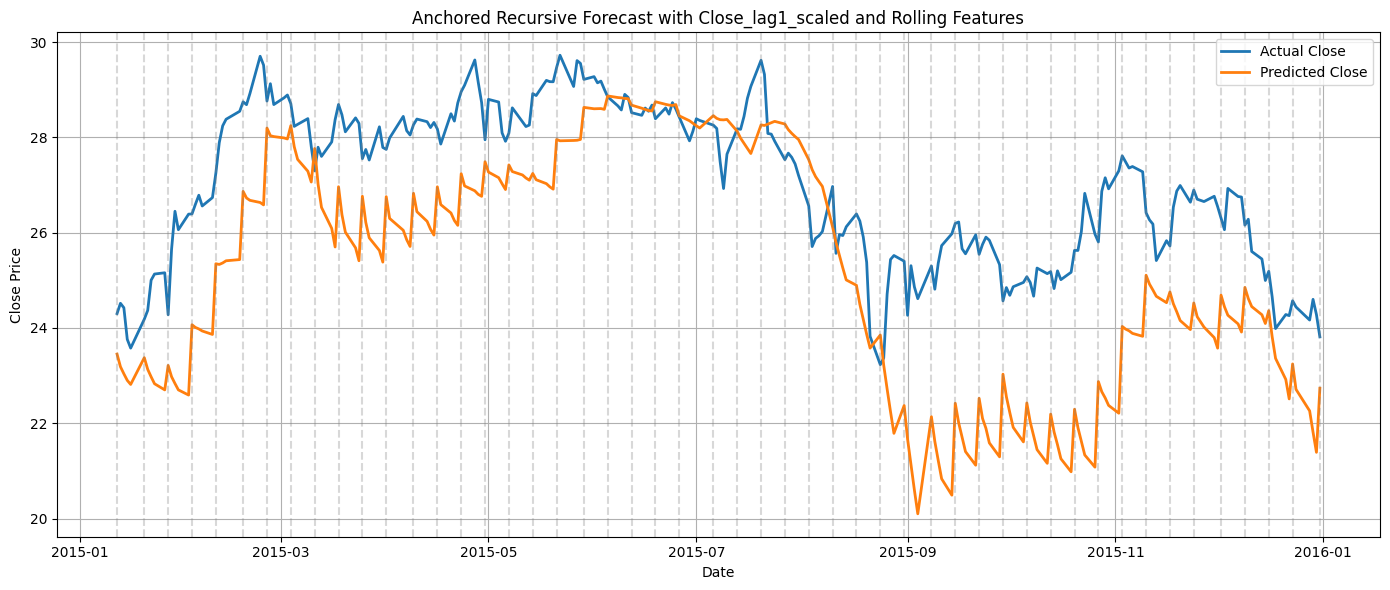

In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df['Close_lag1_scaled'] = scaler_y.transform(df[['Close_lag1']].values)


# === Prepare data and scaling ===

# 1. Create Close_lag1 feature (shifted Close by 1 day)
df['Close_lag1'] = df['Close'].shift(1)
df = df.dropna(subset=['Close_lag1'])  # drop NaNs from lag

# 2. Define train/test splits (adjust as needed)
train_df = df.loc[:'2014-12-31'].copy()
test_df = df.loc['2015-01-01':].copy()

# 3. Fit scaler_y on training Close
scaler_y = MinMaxScaler()
scaler_y.fit(train_df[['Close']])

# 4. Scale Close_lag1 using the same scaler_y
train_df['Close_lag1_scaled'] = scaler_y.transform(train_df[['Close_lag1']].rename(columns={'Close_lag1':'Close'}))
test_df['Close_lag1_scaled'] = scaler_y.transform(test_df[['Close_lag1']].rename(columns={'Close_lag1':'Close'}))

# 5. Replace 'Close_lag1' with 'Close_lag1_scaled' in features list
features = list(features)  # ensure list
features = [f if f != 'Close_lag1' else 'Close_lag1_scaled' for f in features]

# 6. Fit scaler_X on train features (including Close_lag1_scaled)
scaler_X = MinMaxScaler()
X_train = scaler_X.fit_transform(train_df[features])
X_test = scaler_X.transform(test_df[features])

# === Anchored recursive forecast with rolling features update ===

window = 20
horizon = 5

# Use full range including lookback for rolling feature calculation
lookback_start = pd.Timestamp("2014-12-01")  # enough for initial window
lookback_end = pd.Timestamp("2015-12-31")
df_test_window = df.loc[lookback_start:lookback_end].copy()
all_2015_dates = df.loc['2014-12-11':'2015-12-31'].index  # matches rolling length

# Indexes of features
idx_close_lag1 = features.index('Close_lag1_scaled')
idx_ma_5 = features.index('ma_5')
idx_volatility_63 = features.index('volatility_63')

def recompute_features(past_window_scaled):
    new_features = past_window_scaled[-1].copy()
    # ma_5 rolling mean of last 5 Close_lag1_scaled
    close_vals_5 = past_window_scaled[-5:, idx_close_lag1]
    new_features[idx_ma_5] = np.mean(close_vals_5)
    # volatility_63 rolling std dev of last 63 Close_lag1_scaled
    length_for_vol = min(len(past_window_scaled), 63)
    close_vals_vol = past_window_scaled[-length_for_vol:, idx_close_lag1]
    new_features[idx_volatility_63] = np.std(close_vals_vol)
    return new_features

y_pred_scaled = []
y_pred_dates = []

n_blocks = (len(all_2015_dates) - window) // horizon + 1

for b in range(n_blocks):
    block_start_idx = b * horizon
    block_window_start_idx = block_start_idx
    block_window_end_idx = block_window_start_idx + window

    # Anchor window dates and data (unscaled)
    window_dates = all_2015_dates[block_window_start_idx:block_window_end_idx]
    X_window_real = df.loc[window_dates, features].values

    # Scale input window
    X_window_scaled = scaler_X.transform(X_window_real)

    # Snap last day Close_lag1_scaled in anchor window to true scaled Close value
    anchor_date = window_dates[-1]
    # Correctly scale the actual lag-1 close (yesterday's close)
    anchor_idx = df.index.get_loc(anchor_date)
    prev_close = df.iloc[anchor_idx - 1]['Close']
    prev_close_scaled = scaler_y.transform([[prev_close]])[0][0]
    X_window_scaled[-1, idx_close_lag1] = prev_close_scaled

    current_input = X_window_scaled.copy()

    for h in range(horizon):
        pred_date_idx = block_window_end_idx + h
        if pred_date_idx >= len(all_2015_dates):
            break
        pred_date = all_2015_dates[pred_date_idx]

        # Prepare model input shape (1, window, features)
        X_input_seq = current_input[-window:].reshape(1, window, -1)

        # Predict next scaled Close_lag1_scaled
        next_close_scaled = model.predict(X_input_seq, verbose=0)[0][0]

        # Save prediction and date
        y_pred_scaled.append([next_close_scaled])
        y_pred_dates.append(pred_date)

        # Build next day's features vector
        new_row = current_input[-1].copy()
        new_row[idx_close_lag1] = next_close_scaled  # update with prediction

        # Temporarily append and recompute rolling features
        temp_input = np.vstack([current_input, new_row])
        new_row_updated = recompute_features(temp_input)

        # Append updated new_row for next iteration
        current_input = np.vstack([current_input, new_row_updated])

# Convert predictions back to original scale
y_pred_scaled = np.array(y_pred_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# True Close prices for predicted dates
y_true = df.loc[y_pred_dates, 'Close']

# Plot results
plt.figure(figsize=(14, 6))
plt.plot(y_true.index, y_true.values, label='Actual Close', linewidth=2)
plt.plot(y_true.index, y_pred.flatten(), label='Predicted Close', linewidth=2)

# Vertical lines at anchor points (every horizon days)
for dt in y_pred_dates[::horizon]:
    plt.axvline(dt, color='gray', linestyle='--', alpha=0.3)

plt.title("Anchored Recursive Forecast with Close_lag1_scaled and Rolling Features")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
